   # Sandbox: Ignore this
   This notebook contains little experiments on doing things with python, jupyter, ipython et cetera
   It's not a central part of the project.
    
   Mostly ad hoc code snippets.  And not documented well

In [22]:
import os
import sys
import time
import datetime
import touch
# don't really need these below, just for testing
import numpy
from PIL import Image 
import plotnine as pn
import pandas as pd
print(sys.version_info)

sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)


In [23]:
mlist = list(filter(lambda x: inspect.ismodule(x[1]), locals().items()))
vi = sys.version_info
print("version {0}.{1}.{2} of Python".format(vi.major, vi.minor, vi.micro))
for name, mod in mlist:
    mname = name
    if name.startswith("__"):
        continue
    if hasattr(mod, "__version__"):
        mname = name
        if hasattr(mod, "__path__"):
            mname = os.path.split(mod.__path__[0])[1]
        print("version {1} of {0} as {2} ".format(mname, name, mod.__version__))
    elif hasattr(mod, "__file__") and "site-packages" in mod.__file__:
        print("No __version__ for {0} as {1}".format(mname, name))
del mod
del name

version 3.8.5 of Python
version Image of Image as 8.0.1 
version pn of plotnine as 0.7.1 
version pd of pandas as 1.1.3 
version nbformat of nbformat as 5.0.8 
version np of numpy as 1.19.3 
version numpy of numpy as 1.19.3 
No __version__ for touch as touch


In [24]:
# snippet to see the source code for a fuction
import inspect
import nbformat
fname = "nbformat.convert"
lines = inspect.getsource(eval(fname))
#print(lines)

In [25]:
# to get the names of notebook files in a directory
def get_project_notebooks():
    from nbformat import read, NO_CONVERT
    import os
    import datetime
    proj_nbs = []
    nb_fnames = [f for f in os.listdir() if f.endswith(".ipynb")]
    for fn in nb_fnames:
        with open(fn) as fp:
            notebook = read(fp, as_version=NO_CONVERT)
        cells = notebook['cells']
        if not cells:
            continue
        src =cells[0]["source"]
        if not src:
            continue
        lines = src.split("\n")
        if lines[0].startswith("# "):
            proj_nbs.append(fn)
    return(proj_nbs)
get_project_notebooks()

['combining_claims.ipynb',
 'DataSources.ipynb',
 'fastpages-howto.ipynb',
 'fred.ipynb',
 'google.ipynb',
 'Intro_Overview.ipynb',
 'setup.ipynb',
 'Setup_old.ipynb',
 'umich_cs.ipynb',
 'weekly_claims.ipynb']

In [26]:
# print the source code for a cell
def print_source(cell):
    print("type cell= {0}".format(type(cell)))
    src = cell["source"]
    lines = src.split("\n")
    print("{0} lines".format(len(lines)))
    for i,line in enumerate(lines):
        print("({0}){1}".format(i, line))

# run notebook code
def run_nb_code(nbfile):
    from nbformat import read, NO_CONVERT
    import os
    import datetime
    res = "Start time: " + str(datetime.datetime.now())
    with open(nbfile) as fp:
        notebook = read(fp, NO_CONVERT)
    cells = notebook['cells']
    code_cells = [c for c in cells if c['cell_type'] == 'code']
    for i, cell in enumerate(code_cells):
        src = cell['source']
        #print("{0}<{1}>".format(li, line))                
        try:
            exec(src, globals(), locals())
        except Exception as e:
            print("Error on cell {0}\n".format(i))
            print(src)
            print_source(cell)
            exc_type, exc_obj, exc_tb = sys.exc_info()
            import traceback
            traceback.print_tb(exc_tb)
            fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
            print(exc_type, fname, exc_tb.tb_lineno)
            return((exc_type, exc_obj, exc_tb, fname))
    res += "end: " + str(datetime.datetime.now())
    return res
# run notebook code
def get_first_cell_line(nbfile):
    from nbformat import read, NO_CONVERT
    import os
    import datetime
    res = "Start time: " + str(datetime.datetime.now())
    with open(nbfile) as fp:
        notebook = read(fp, NO_CONVERT)
    cells = notebook['cells']
    if not cells:
        return ""
    lines = cells[0]["source"].split("\n")
    if not lines:
        return ""
    return lines[0]
%run bar.ipynb

In [27]:
# Touch them in order
import time
nbs = get_project_notebooks()
last  = len(nbs) - 1
nblist = [""]*len(nbs)
for nb in nbs:
    line = get_first_cell_line(nb)
    line_parts = line.split(" ")
    if len(line_parts) > 3 and line_parts[1] == "Part":
        try:
            index = int(line_parts[2]) - 1
        except:
            index = last
            last -= 1
    else:
        index = last
        last -= 1
    nblist[index] = nb
    #print(f"{nb}, index={index}, {line}")
print(nblist)
def add_str_to_file(fname, str="\n"):
    with open(fname, mode='a') as fp:
        fp.write(str)
    return
for nb in nblist:
    try:
        print("{0} {1}".format(nb, datetime.datetime.now()))
        touch.touch(nb)
        add_str_to_file(nb, str="\n")
        time.sleep(1)
    except Exception as e:
        print(e)

['Intro_Overview.ipynb', 'DataSources.ipynb', 'fred.ipynb', 'weekly_claims.ipynb', 'umich_cs.ipynb', 'google.ipynb', 'combining_claims.ipynb', 'Setup_old.ipynb', 'setup.ipynb', 'fastpages-howto.ipynb']
Intro_Overview.ipynb 2020-11-27 09:35:36.124956
DataSources.ipynb 2020-11-27 09:35:37.134664
fred.ipynb 2020-11-27 09:35:38.144727
weekly_claims.ipynb 2020-11-27 09:35:39.157522
umich_cs.ipynb 2020-11-27 09:35:40.172476
google.ipynb 2020-11-27 09:35:41.190532
combining_claims.ipynb 2020-11-27 09:35:42.208488
Setup_old.ipynb 2020-11-27 09:35:43.213129
setup.ipynb 2020-11-27 09:35:44.228683
fastpages-howto.ipynb 2020-11-27 09:35:45.241362


weekly_claims.ipynb
version 3.8.5 of Python
version 8.0.1 of Image
version 0.7.1 of pn
version 1.1.3 of pd
version 5.0.8 of nbformat
version 1.19.3 of np
version 3.3.3 of mpl
version 1.2.0 of xlrd
version 3.141.0 of selenium
version 3.14.1 of webdriver
new file: ./data/temp\weekly_pandemic_claims.xlsx
State           object
date            object
PUA IC          object
Reflect Date    object
PUA CC          object
PEUC CC         object
dtype: object
found 0 non numeric rows
['PUA IC', 'PUA CC', 'PEUC CC'] are object, should be numeric
State            object
date             object
PUA IC          float64
Reflect Date     object
PUA CC          float64
PEUC CC         float64
dtype: object
                   date    PUA IC      PUA CC    PEUC CC
28  2020-10-17 00:00:00  345440.0  10622725.0  3711089.0
29  2020-10-24 00:00:00  359044.0   9332610.0  3983613.0
30  2020-10-31 00:00:00  361959.0   9433127.0  4143389.0
31  2020-11-07 00:00:00  296374.0   8681647.0  4376847.0
32  2020-11-14 

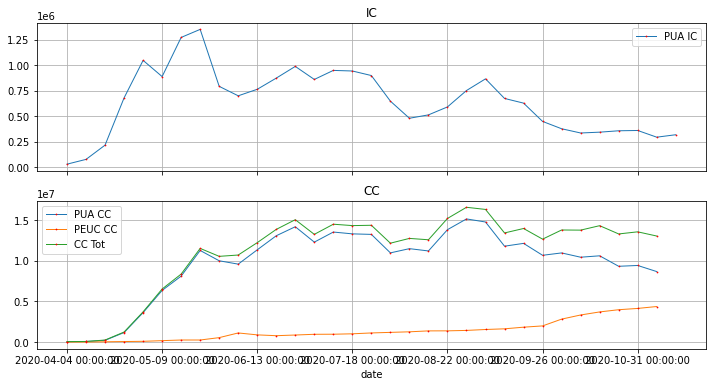

umich_cs.ipynb
version 3.8.5 of Python
version 8.0.1 of Image
version 0.7.1 of pn
version 1.1.3 of pd
version 5.0.8 of nbformat
version 1.19.3 of np
version 3.3.3 of mpl
version 1.2.0 of xlrd
version 3.141.0 of selenium
version 3.14.1 of webdriver
version 2.2.1 of re
set()
set()
{'sca-table5-on-2020-Nov-26.csv'}
new file: ./data/temp\sca-table5-on-2020-Nov-26.csv
Index(['Month', 'Year', 'Personal Finance Current',
       'Personal Finance Expected', 'Business Condition 12 Months',
       'Business Condition 5 Years', 'Buying Conditions', 'Current Index',
       'Expected Index', 'Unnamed: 9'],
      dtype='object')


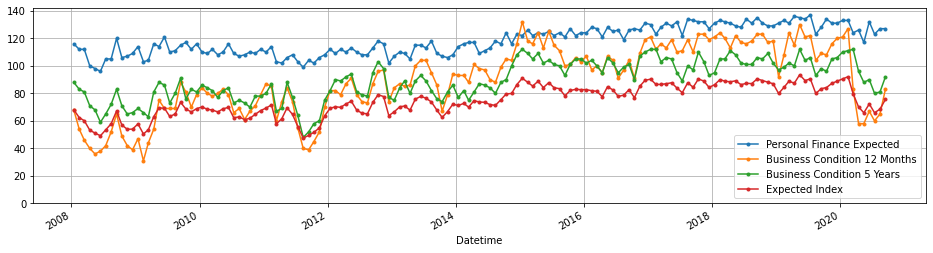

2020-11-26 13:57:42.405262
combiningData.ipynb
fred  shape:(3604, 7)
google_keywords  shape:(24, 6)
tidy_fred  shape:(868, 17)
umich_exp  shape:(153, 5)
us_pau_claims  shape:(33, 4)
Index(['ICSA', 'CCSA', 'PUA IC', 'PUA CC', 'PEUC CC'], dtype='object')
                ICSA       CCSA    PUA IC      PUA CC    PEUC CC
date                                                            
2020-10-17       NaN        NaN  345440.0  10622725.0  3711089.0
2020-10-24  751000.0  7285000.0       NaN         NaN        NaN
2020-10-24       NaN        NaN  359044.0   9332610.0  3983613.0
2020-10-31  751000.0  6786000.0       NaN         NaN        NaN
2020-10-31       NaN        NaN  361959.0   9433127.0  4143389.0
2020-11-07  709000.0  6372000.0       NaN         NaN        NaN
2020-11-07       NaN        NaN  296374.0   8681647.0  4376847.0
2020-11-14  742000.0  6071000.0       NaN         NaN        NaN
2020-11-14       NaN        NaN  320237.0         NaN        NaN
2020-11-21  778000.0        NaN 

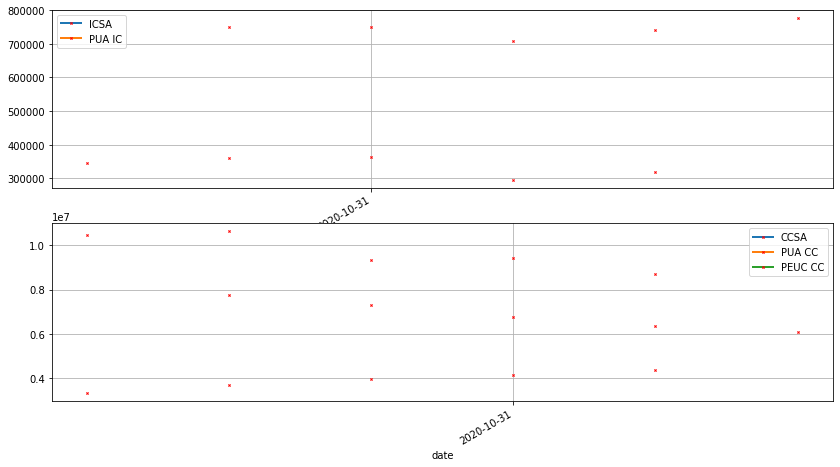

In [5]:
nbs = get_project_notebooks()
nbs = [# 'fred.ipynb',
        # 'DataSources.ipynb',
    #'google.ipynb',
   #'Intro_Overview.ipynb',
     'weekly_claims.ipynb', 
    'umich_cs.ipynb',
      'combiningData.ipynb'
       ]
for nb in nbs:
    print(nb)
    %run $nb

In [ ]:
all_nb_filenames = [f for f in os.listdir() if f.endswith(".ipynb")]
print(all_nb_filenames)
proj_nb_filenames = ['fred.ipynb', 'combiningData.ipynb', 'DataSources.ipynb', 'fastpages-howto.ipynb', 
                     'foo.ipynb', 'fred.ipynb', 'google.ipynb', 'Intro_Overview.ipynb', 'umich_cs.ipynb', 'weekly_claims.ipynb']

In [ ]:
import IPython
app = IPython.Application.instance()
dir(app.kernel)
app.kernel.do_shutdown(restart=True)
#app.kernel.do_shutdown(True) 
print(datetime.datetime.now())

In [ ]:
import re
head, tail = os.path.split(downloaded_fpath)
base, ext = os.path.splitext(tail)
pattern = "(.*)(\(.*\))"
match = re.match(pattern, base)
if not match:
    msg = "Error cleaning {0}\nNo match for pattern: <{1}>".format(fpath, pattern)
    raise Exception(msg)
new_base = match.group(1).strip()
new_fname = new_base + ext
return new_fname

In [ ]:
def print_vars(globs=True, locs=True, 
               filters={"exclude":("^_",)}):
    import re
    dicts = {"globs":globals().keys(),
            "locs":locals().keys()}
    for k,v in dicts.items():
        print("k={0}, eval(k)= {1}".format(k, eval(k)))
        if eval(k):
            y = [x for x in dicts[k]]
            if filters:
                if filters["exclude"]:
                    for filt in filters["exclude"]:
                        print("excluding: {0}".format(filt))
                        y = [x for x in y if not re.search(filt, x)]
            print("{0}= {1}".format(k,y))
        del y
print_vars()

In [ ]:
z